ICBHI Dataset

Train_Test Info :
................
    Patient number Recording index Chest location Acquisition mode   \
0             101             1b1             Al                sc   
1             101             1b1             Pr                sc   
2             102             1b1             Ar                sc   
3             103             2b2             Ar                mc   
4             104             1b1             Al                sc   

  Recording equipment TrainTestStatus  
0            Meditron            test  
1            Meditron            test  
2            Meditron            test  
3            LittC2SE           train  
4            Litt3200            test  

Diagnosis Info :
................
    Patient number Recording index Chest location Acquisition mode   \
0             101             1b1             Al                sc   
1             101             1b1             Pr                sc   
2             102             1b1         

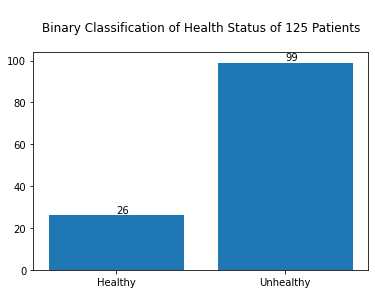

In [20]:
#Binary Classification of ICBHI Dataset"

# import libraries
from datetime import datetime
from os import listdir
from os.path import isfile, join
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


train_test = pd.read_csv("https://bhichallenge.med.auth.gr/sites/default/files/ICBHI_final_database/ICBHI_challenge_train_test.txt",
                         header = None,sep='_|	|[|]',engine='python')
train_test.columns = ['Patient number', 'Recording index', 'Chest location','Acquisition mode ','Recording equipment','TrainTestStatus']
train_test.to_csv('ICBHI_challenge_train_test.csv')
print("ICBHI Dataset\n")
print("Train_Test Dataset Info")
print("................\n",train_test.head())

diagnosis=pd.read_csv("https://bhichallenge.med.auth.gr/sites/default/files/ICBHI_final_database/ICBHI_Challenge_diagnosis.txt",header = None,delimiter='	') 
diagnosis.columns = ['Patient number','Health Status']
diagnosis.to_csv('ICBHI_Challenge_diagnosis.csv')
merged = diagnosis.merge(train_test, on='Patient number')
print("\nDiagnosis dATASET Info :")
print("................\n",train_test.head())

#"AUDIO" folder created after seperating audio files taken from this link 
#https://bhichallenge.med.auth.gr/sites/default/files/ICBHI_final_database/ICBHI_final_database.zip
#Plz change Path Accordingly"


mypath = "AUDIO/"
filenames = [f for f in listdir(mypath) if (isfile(join(mypath, f)) and f.endswith('.wav'))]
p_id_in_file = [] # patient IDs corresponding to each file
for name in filenames:
    p_id_in_file.append(int(name[:3]))

p_id_in_file = np.array(p_id_in_file) 


#List of Unique pateient fetched from Audio Files"
unique_patient_list = []
for x in p_id_in_file:
        # check if exists in unique_list or not
        if x not in unique_patient_list:
            unique_patient_list.append(x)

        
#Reading Diagonsis File        
p_diag = pd.read_csv("ICBHI_Challenge_diagnosis.csv") 


#List of Unique Diagonsis Class
unique_class_list = []
for x1 in p_diag['Health Status']:
        # check if exists in unique_list or not
        if x1 not in unique_class_list:
            unique_class_list.append(x1)
print("\nNo of Diagnosis Cases : \n......................\n",len(unique_class_list))
print("\nDiagnosis Classes : \n...................\n",unique_class_list)
        
#List of Healthy & Unhelathy
Healthy=[]
Unhealthy=[]
for H in range(125):
    #if H not in Healthy:
        if p_diag['Health Status'][H] == "Healthy":
          Healthy.append(H)
        else:
         Unhealthy.append(H)    

print("\nTotal Healthy Identified : \n..........................\n",len(Healthy))
print("\nTotal Unealthy Identified : \n..........................\n",len(Unhealthy))

data={'Healthy':len(Healthy), 'Unhealthy':len(Unhealthy)}
Health_Status = list(data.keys())
Values = list(data.values())

#Plot the Healthy vs Unhelathy Bar Chart
plt.bar(Health_Status,Values)
for index,data in enumerate(Values):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=10))
plt.title("\nBinary Classification of Health Status of 125 Patients\n")
plt.show()